In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import json
# setting display format so that large values are shown properly
pd.set_option('display.float_format', lambda x: '%.4f' % x)

plt.style.use('ggplot')

In [437]:
if os.path.isfile('loan.csv'):
    print("loading from csv")
    loans = pd.read_csv('loan.csv', low_memory=False, encoding='iso-8859-1')
else:
    print("loading from zip")
    loans = pd.read_csv('loan.zip',
                        compression='zip',
                        low_memory=False,
                        encoding='iso-8859-1')

loans.info()

loading from zip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Getting basic info about the data

In [438]:
loans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

Showing the counts of entries per column

In [439]:
loans.count()

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [440]:
num_rows = loans.shape[0]
num_missing = num_rows - loans.count()
print(num_missing)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [441]:
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Finding columns which have NAN

In [442]:
def get_columns_with_nan_percentage(df):
    nan_cols = [{
            "column":c,
            "percentage":round(100*(df[c].isnull().sum()/len(df[c].index)), 2)
            } for c in df.columns if round(100*(df[c].isnull().sum()/len(df[c].index)), 2)>0]
    return nan_cols

In [443]:
def pretty_print_dictionary(data):
    print(json.dumps(data, indent=1))

In [444]:
pretty_print_dictionary(get_columns_with_nan_percentage(loans))

[
 {
  "column": "emp_title",
  "percentage": 6.19
 },
 {
  "column": "emp_length",
  "percentage": 2.71
 },
 {
  "column": "desc",
  "percentage": 32.58
 },
 {
  "column": "title",
  "percentage": 0.03
 },
 {
  "column": "mths_since_last_delinq",
  "percentage": 64.66
 },
 {
  "column": "mths_since_last_record",
  "percentage": 92.99
 },
 {
  "column": "revol_util",
  "percentage": 0.13
 },
 {
  "column": "last_pymnt_d",
  "percentage": 0.18
 },
 {
  "column": "next_pymnt_d",
  "percentage": 97.13
 },
 {
  "column": "last_credit_pull_d",
  "percentage": 0.01
 },
 {
  "column": "collections_12_mths_ex_med",
  "percentage": 0.14
 },
 {
  "column": "mths_since_last_major_derog",
  "percentage": 100.0
 },
 {
  "column": "annual_inc_joint",
  "percentage": 100.0
 },
 {
  "column": "dti_joint",
  "percentage": 100.0
 },
 {
  "column": "verification_status_joint",
  "percentage": 100.0
 },
 {
  "column": "tot_coll_amt",
  "percentage": 100.0
 },
 {
  "column": "tot_cur_bal",
  "percentage": 

#### Deleting columns which have 100% NAN

In [445]:
loans = loans.dropna(how='all', axis=1)
pretty_print_dictionary(get_columns_with_nan_percentage(loans))

[
 {
  "column": "emp_title",
  "percentage": 6.19
 },
 {
  "column": "emp_length",
  "percentage": 2.71
 },
 {
  "column": "desc",
  "percentage": 32.58
 },
 {
  "column": "title",
  "percentage": 0.03
 },
 {
  "column": "mths_since_last_delinq",
  "percentage": 64.66
 },
 {
  "column": "mths_since_last_record",
  "percentage": 92.99
 },
 {
  "column": "revol_util",
  "percentage": 0.13
 },
 {
  "column": "last_pymnt_d",
  "percentage": 0.18
 },
 {
  "column": "next_pymnt_d",
  "percentage": 97.13
 },
 {
  "column": "last_credit_pull_d",
  "percentage": 0.01
 },
 {
  "column": "collections_12_mths_ex_med",
  "percentage": 0.14
 },
 {
  "column": "chargeoff_within_12_mths",
  "percentage": 0.14
 },
 {
  "column": "pub_rec_bankruptcies",
  "percentage": 1.75
 },
 {
  "column": "tax_liens",
  "percentage": 0.1
 }
]


#### Deleting columns with more than 90% empty values

In [446]:
loans = loans.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1)
pretty_print_dictionary(get_columns_with_nan_percentage(loans))

[
 {
  "column": "emp_title",
  "percentage": 6.19
 },
 {
  "column": "emp_length",
  "percentage": 2.71
 },
 {
  "column": "desc",
  "percentage": 32.58
 },
 {
  "column": "title",
  "percentage": 0.03
 },
 {
  "column": "mths_since_last_delinq",
  "percentage": 64.66
 },
 {
  "column": "revol_util",
  "percentage": 0.13
 },
 {
  "column": "last_pymnt_d",
  "percentage": 0.18
 },
 {
  "column": "last_credit_pull_d",
  "percentage": 0.01
 },
 {
  "column": "collections_12_mths_ex_med",
  "percentage": 0.14
 },
 {
  "column": "chargeoff_within_12_mths",
  "percentage": 0.14
 },
 {
  "column": "pub_rec_bankruptcies",
  "percentage": 1.75
 },
 {
  "column": "tax_liens",
  "percentage": 0.1
 }
]


#### Deleting not useful columns like `desc`

In [447]:
loans = loans.drop(['desc'], axis=1)
pretty_print_dictionary(get_columns_with_nan_percentage(loans))

[
 {
  "column": "emp_title",
  "percentage": 6.19
 },
 {
  "column": "emp_length",
  "percentage": 2.71
 },
 {
  "column": "title",
  "percentage": 0.03
 },
 {
  "column": "mths_since_last_delinq",
  "percentage": 64.66
 },
 {
  "column": "revol_util",
  "percentage": 0.13
 },
 {
  "column": "last_pymnt_d",
  "percentage": 0.18
 },
 {
  "column": "last_credit_pull_d",
  "percentage": 0.01
 },
 {
  "column": "collections_12_mths_ex_med",
  "percentage": 0.14
 },
 {
  "column": "chargeoff_within_12_mths",
  "percentage": 0.14
 },
 {
  "column": "pub_rec_bankruptcies",
  "percentage": 1.75
 },
 {
  "column": "tax_liens",
  "percentage": 0.1
 }
]


#### Deleting rows where `revol_util`, `last_pymnt_d`,`last_credit_pull_d`, `collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `pub_rec_bankruptcies` or `tax_liens` is NAN

In [448]:
loans = loans[~loans['revol_util'].isnull()]
loans = loans[~loans['last_pymnt_d'].isnull()]
loans = loans[~loans['last_credit_pull_d'].isnull()]
loans = loans[~loans['collections_12_mths_ex_med'].isnull()]
loans = loans[~loans['chargeoff_within_12_mths'].isnull()]
loans = loans[~loans['pub_rec_bankruptcies'].isnull()]
loans = loans[~loans['tax_liens'].isnull()]

pretty_print_dictionary(get_columns_with_nan_percentage(loans))

[
 {
  "column": "emp_title",
  "percentage": 6.18
 },
 {
  "column": "emp_length",
  "percentage": 2.74
 },
 {
  "column": "title",
  "percentage": 0.03
 },
 {
  "column": "mths_since_last_delinq",
  "percentage": 65.79
 }
]


In [449]:
loans = loans.drop(['emp_title', 'title','url'], axis=1)

In [450]:
loans['emp_length'].value_counts()

10+ years    8750
< 1 year     4397
2 years      4291
3 years      4023
4 years      3377
5 years      3235
1 year       3133
6 years      2193
7 years      1747
8 years      1449
9 years      1238
Name: emp_length, dtype: int64

`emp_length` is a ordinal categorical variable, however only 2.74% rows does not have this column, we can drop such rows as even after this we will have a descent data size

In [451]:
loans = loans[~loans['emp_length'].isnull()]
pretty_print_dictionary(get_columns_with_nan_percentage(loans))

[
 {
  "column": "mths_since_last_delinq",
  "percentage": 65.74
 }
]


Dropping `mths_since_last_delinq` as **~65%** are NAN 

In [452]:
loans = loans.drop(['mths_since_last_delinq'], axis=1)

We can delete `member_id` and `id` as they will not help in the analysis

In [453]:
loans = loans.drop(['id','member_id'], axis=1)

Find columns with less than 1 unique values

In [454]:
loans.columns[loans.nunique() <= 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [455]:
loans = loans.drop(loans.columns[loans.apply(lambda col:(len(col.unique())<=1))], axis=1)

In [456]:
loans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37833 entries, 0 to 39623
Data columns (total 39 columns):
loan_amnt                  37833 non-null int64
funded_amnt                37833 non-null int64
funded_amnt_inv            37833 non-null float64
term                       37833 non-null object
int_rate                   37833 non-null object
installment                37833 non-null float64
grade                      37833 non-null object
sub_grade                  37833 non-null object
emp_length                 37833 non-null object
home_ownership             37833 non-null object
annual_inc                 37833 non-null float64
verification_status        37833 non-null object
issue_d                    37833 non-null object
loan_status                37833 non-null object
purpose                    37833 non-null object
zip_code                   37833 non-null object
addr_state                 37833 non-null object
dti                        37833 non-null float64
delinq_

In [457]:
len(loans)

37833

In [458]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,10+ years,RENT,...,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000
1,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,< 1 year,RENT,...,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000
2,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,10+ years,RENT,...,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,May-16,0.0000
3,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,10+ years,RENT,...,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,Apr-16,0.0000
4,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,1 year,RENT,...,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,May-16,67.7900,May-16,0.0000


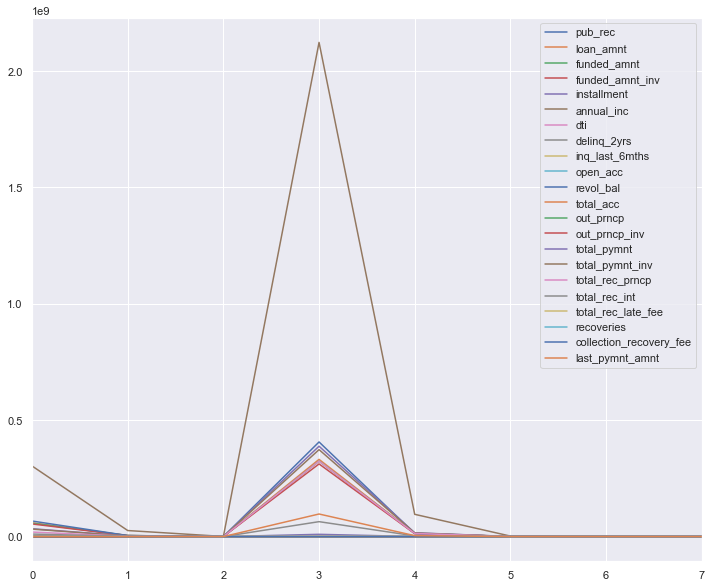

In [485]:
loans.groupby(['loan_status','pub_rec']).sum().reset_index().plot()

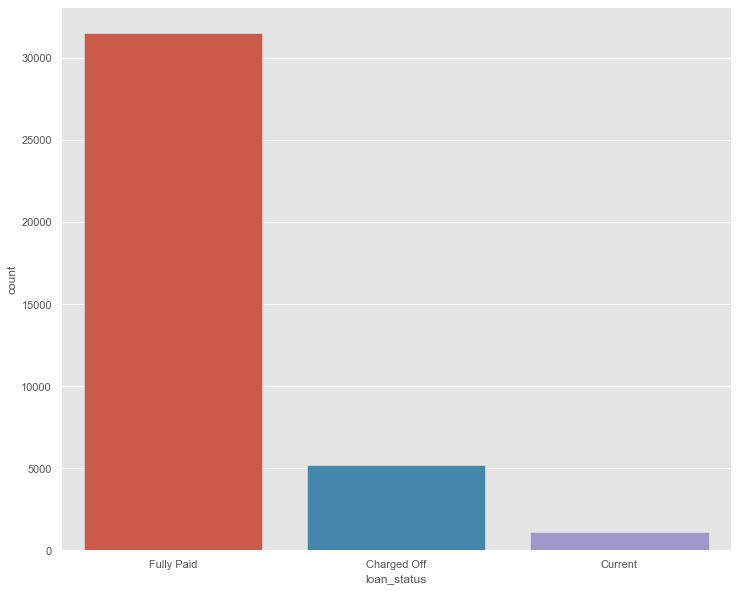

In [460]:
sns.countplot(x='loan_status',data=loans)

Deleting all rows where the status is `current`

In [461]:
loans = loans[~(loans['loan_status']=='Current')]
loans['loan_defaulted'] = loans['loan_status'].apply(lambda x: 'Y' if x =='Charged Off' else 'N')

In [462]:
loans['loan_status'].value_counts()

Fully Paid     31533
Charged Off     5202
Name: loan_status, dtype: int64

Rectangle(xy=(-0.4, 0), width=0.8, height=31533, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=5202, angle=0)


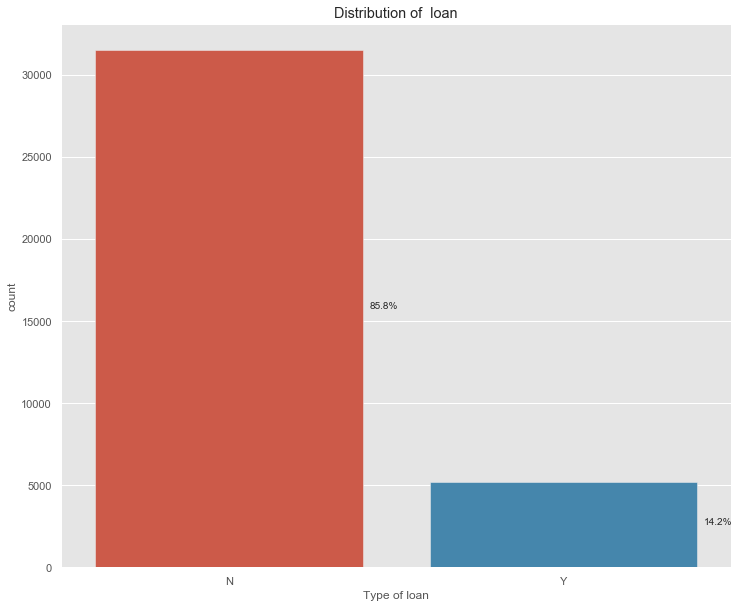

In [463]:
ax = sns.countplot(x='loan_defaulted', data=loans)

plt.title('Distribution of  loan')
plt.xlabel('Type of loan')

total = len(loans['loan_defaulted'])
for p in ax.patches:
    print(p)
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()

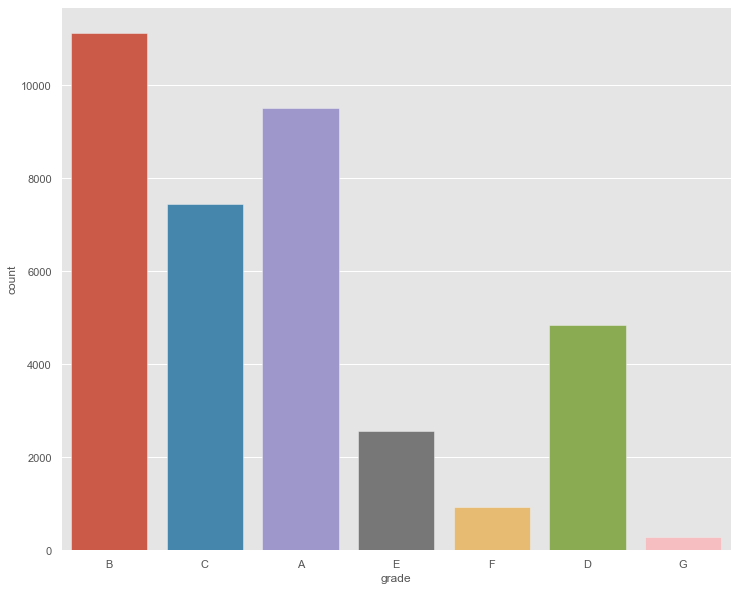

In [464]:
sns.countplot(x='grade',data=loans)

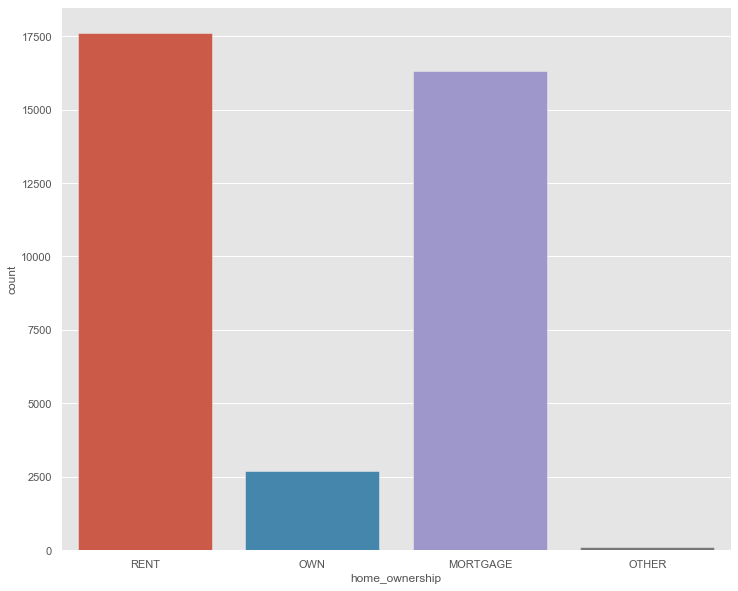

In [465]:
sns.countplot(x='home_ownership',data=loans)

Changing type of columns `collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `pub_rec_bankruptcies` and `tax_liens` from float to int

In [466]:
loans_num = loans.select_dtypes(include=['int64','float64'])
loans_num.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,...,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000,36735.0000
mean,11153.4531,10884.2317,10444.7007,324.9947,69468.9407,13.3371,0.1460,0.8689,9.3058,0.0540,...,0.0000,12020.2755,11544.8782,9766.7111,2154.8479,1.3409,97.3757,12.4964,2800.1264,0.0417
std,7368.3826,7107.2998,7008.0288,208.8390,64063.8854,6.6496,0.4914,1.0675,4.3760,0.2353,...,0.0000,8849.6020,8705.6407,7034.1563,2412.1385,7.2043,700.4411,150.2953,4537.7651,0.2005
min,500.0000,500.0000,0.0000,16.0800,4000.0000,0.0000,0.0000,0.0000,2.0000,0.0000,...,0.0000,33.7300,0.0000,0.0000,6.2200,0.0000,0.0000,0.0000,0.0100,0.0000
25%,5500.0000,5425.0000,5000.0000,167.7300,41200.0000,8.2200,0.0000,0.0000,6.0000,0.0000,...,0.0000,5590.5861,5292.7300,4641.2650,660.7750,0.0000,0.0000,0.0000,223.5950,0.0000
50%,10000.0000,9600.0000,9000.0000,280.2800,60000.0000,13.4300,0.0000,1.0000,9.0000,0.0000,...,0.0000,9832.2917,9375.5800,8000.0000,1328.6800,0.0000,0.0000,0.0000,592.1300,0.0000
75%,15000.0000,15000.0000,14353.3263,429.4500,83000.0000,18.5900,0.0000,1.0000,12.0000,0.0000,...,0.0000,16322.6987,15637.7650,13500.0000,2720.6600,0.0000,0.0000,0.0000,3554.3500,0.0000
max,35000.0000,35000.0000,35000.0000,1305.1900,6000000.0000,29.9900,11.0000,8.0000,44.0000,4.0000,...,0.0000,58563.6799,58563.6800,35000.0200,23563.6800,180.2000,29623.3500,7002.1900,36115.2000,2.0000


In [467]:
loans['pub_rec_bankruptcies'].value_counts()

0.0000    35209
1.0000     1521
2.0000        5
Name: pub_rec_bankruptcies, dtype: int64

We can see `pub_rec_bankruptcies` has 3 values, which can be considered as Ordinal categorical variable

In [468]:
loans['pub_rec_bankruptcies'] = loans['pub_rec_bankruptcies'].astype('category')

In [469]:
loans_num.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.0000,0.9815,0.9522,0.9311,0.2700,0.0602,-0.0345,0.0108,0.1740,-0.0468,...,nan,0.8833,0.8596,0.8473,0.7282,0.0481,0.1433,0.0772,0.4755,-0.0315
funded_amnt,0.9815,1.0000,0.9717,0.9572,0.2660,0.0604,-0.0346,0.0108,0.1726,-0.0472,...,nan,0.9006,0.8777,0.8660,0.7368,0.0504,0.1437,0.0788,0.4797,-0.0324
funded_amnt_inv,0.9522,0.9717,1.0000,0.9239,0.2570,0.0634,-0.0385,0.0001,0.1627,-0.0509,...,nan,0.8864,0.9081,0.8510,0.7311,0.0365,0.1351,0.0681,0.4709,-0.0371
installment,0.9311,0.9572,0.9239,1.0000,0.2690,0.0503,-0.0229,0.0085,0.1698,-0.0422,...,nan,0.8600,0.8335,0.8499,0.6416,0.0583,0.1209,0.0772,0.4144,-0.0291
annual_inc,0.2700,0.2660,0.2570,0.2690,1.0000,-0.1237,0.0215,0.0348,0.1559,-0.0143,...,nan,0.2572,0.2490,0.2578,0.1852,0.0080,0.0227,0.0167,0.1441,-0.0123
dti,0.0602,0.0604,0.0634,0.0503,-0.1237,1.0000,-0.0349,0.0006,0.2903,-0.0053,...,nan,0.0572,0.0598,0.0350,0.1007,-0.0118,0.0238,0.0096,0.0075,0.0065
delinq_2yrs,-0.0345,-0.0346,-0.0385,-0.0229,0.0215,-0.0349,1.0000,0.0080,0.0116,0.0104,...,nan,-0.0252,-0.0295,-0.0404,0.0222,0.0293,0.0110,0.0124,-0.0124,0.0051
inq_last_6mths,0.0108,0.0108,0.0001,0.0085,0.0348,0.0006,0.0080,1.0000,0.0947,0.0229,...,nan,-0.0079,-0.0155,-0.0213,0.0276,0.0315,0.0183,0.0119,0.0281,0.0138
open_acc,0.1740,0.1726,0.1627,0.1698,0.1559,0.2903,0.0116,0.0947,1.0000,0.0039,...,nan,0.1589,0.1511,0.1564,0.1216,-0.0190,0.0179,0.0078,0.0800,0.0096
pub_rec,-0.0468,-0.0472,-0.0509,-0.0422,-0.0143,-0.0053,0.0104,0.0229,0.0039,1.0000,...,nan,-0.0498,-0.0524,-0.0615,-0.0018,-0.0054,-0.0060,-0.0067,-0.0333,0.8413


In [470]:
loans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36735 entries, 0 to 39623
Data columns (total 40 columns):
loan_amnt                  36735 non-null int64
funded_amnt                36735 non-null int64
funded_amnt_inv            36735 non-null float64
term                       36735 non-null object
int_rate                   36735 non-null object
installment                36735 non-null float64
grade                      36735 non-null object
sub_grade                  36735 non-null object
emp_length                 36735 non-null object
home_ownership             36735 non-null object
annual_inc                 36735 non-null float64
verification_status        36735 non-null object
issue_d                    36735 non-null object
loan_status                36735 non-null object
purpose                    36735 non-null object
zip_code                   36735 non-null object
addr_state                 36735 non-null object
dti                        36735 non-null float64
delinq_

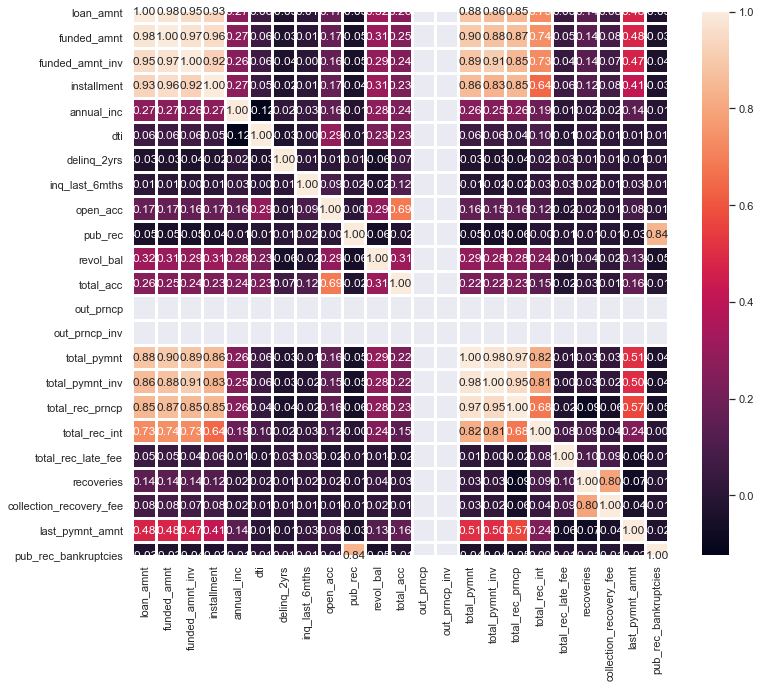

In [471]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(loans_num.corr(), annot=True, fmt='.2f', linewidths=2)


In [472]:
def get_lower_upper_bound(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound

In [473]:
def get_outlier_iqr(data):
    lower, upper = get_lower_upper_bound(data)
    return data[np.where((data > upper) | (data < lower))]


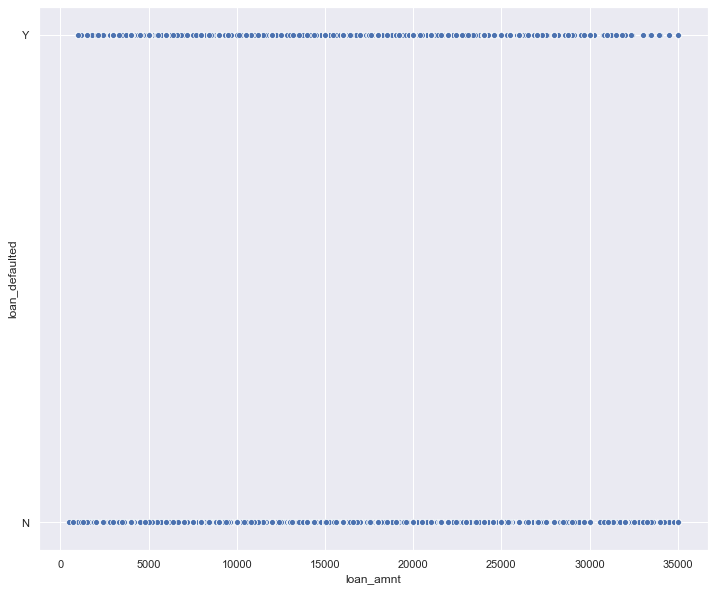

In [474]:
sns.scatterplot(x='loan_amnt', y='loan_defaulted' ,data=loans)


In [475]:
len(get_outlier_iqr(loans['pub_rec'].values))

1920

In [476]:
loans['earliest_cr_line'].value_counts()

Oct-99    352
Nov-98    348
Dec-98    326
Oct-00    325
Nov-99    304
         ... 
Apr-66      1
Jun-69      1
Nov-54      1
Feb-73      1
Oct-68      1
Name: earliest_cr_line, Length: 513, dtype: int64